# Relax Challenge
"""
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period , identify which factors predict future user
adoption .

The data is available as two attached CSV files:
    takehome_user_engagement. csv
    takehome_users . csv
    
"""    
 

In [2]:
# Load Data
import pandas as pd
df_engage = pd.read_csv('takehome_user_engagement.csv')
df_users = pd.read_csv('takehome_users.csv', encoding = 'latin')

In [3]:
# EDA
print(df_engage.shape)
print(df_users.shape)

(207917, 3)
(12000, 10)


In [4]:
df_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
df_engage.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [7]:
df_users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [8]:
df_engage.head()


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [9]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# Adopted User
"""
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period 
"""

In [10]:
#group users by week, and sums number of visits per week
df_engage['time_stamp'] = pd.to_datetime(df_engage['time_stamp']) #transform time_stamp to datetime object
df_engage = df_engage.set_index(pd.DatetimeIndex(df_engage['time_stamp']))
grp_users = df_engage.groupby('user_id').resample('1W').sum()

In [11]:
print(grp_users.shape)
grp_users.describe()
grp_users.info()

(82282, 2)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 82282 entries, (1, 2014-04-27 00:00:00) to (12000, 2014-01-26 00:00:00)
Data columns (total 2 columns):
user_id    68807 non-null float64
visited    68807 non-null float64
dtypes: float64(2)
memory usage: 1.6 MB


In [12]:
grp_users.head()

user_id  visited
user_id time_stamp                  
1       2014-04-27      1.0      1.0
2       2013-11-17      2.0      1.0
        2013-11-24      NaN      NaN
        2013-12-01      2.0      1.0
        2013-12-08      NaN      NaN

In [13]:
# remove weeks with NaN
grp_users = grp_users[grp_users['user_id'].isnull()==False].drop('user_id',axis=1)
grp_users.head(20)

visited
user_id time_stamp         
1       2014-04-27      1.0
2       2013-11-17      1.0
        2013-12-01      1.0
        2013-12-15      1.0
        2013-12-29      1.0
        2014-01-05      1.0
        2014-01-12      1.0
        2014-02-09      3.0
        2014-02-16      2.0
        2014-03-09      1.0
        2014-03-16      1.0
        2014-04-06      1.0
3       2013-03-24      1.0
4       2013-05-26      1.0
5       2013-01-27      1.0
6       2013-12-22      1.0
7       2012-12-23      1.0
10      2013-01-20      1.0
        2013-01-27      1.0
        2013-02-03      1.0

In [14]:
# identify adopted users
import numpy as np

active_users = grp_users['visited']>=3

#Groups by users and sums up the number of weeks that had 3 or more visits
active_users = active_users.groupby(level=0).apply(np.sum) 

#removes users with no weeks that had 3 or more visits
active_users = active_users[active_users!=0]

active_users = pd.DataFrame(active_users,index=active_users.index)
active_users.columns = ['Active Weeks']
active_users.head(5)

,Active Weeks
user_id,
2,1
10,52
20,1
33,1
42,68


In [15]:
print(active_users.shape)
active_users.info()

(1445, 1)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 2 to 11988
Data columns (total 1 columns):
Active Weeks    1445 non-null int64
dtypes: int64(1)
memory usage: 22.6 KB


In [16]:
#Pull data on adopted users
adopted_user = active_users.merge(df_users,left_index=True,right_on='object_id',how='inner')
adopted_user['Adopted']=1
adopted_user.head()

,Active Weeks,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
1,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
9,52,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1
19,1,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,1
32,1,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,1
41,68,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,1


In [17]:
#Add Adopted column to origional Data
df_users['Adopted']=int(0)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
Adopted                       12000 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [18]:
df_users.iloc[list(adopted_user.index),10]=1

In [19]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
Adopted                       12000 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [20]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


# Feature engineering

In [21]:
# Feature engineering
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
Adopted                       12000 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [22]:
df_features = df_users.set_index('object_id').sort_index()
df_features = df_features.drop([ 'name', 'email','last_session_creation_time',],axis=1)
date_feature = df_features.pop('creation_time')
df_features.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
object_id,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0
2,ORG_INVITE,0,0,1,316.0,1
3,ORG_INVITE,0,0,94,1525.0,0
4,GUEST_INVITE,0,0,1,5151.0,0
5,GUEST_INVITE,0,0,193,5240.0,0


In [23]:
df_features['Adopted'].value_counts()

0    10555
1     1445
Name: Adopted, dtype: int64

In [24]:
df_features['Adopted'].mean()*100

12.041666666666668

In [25]:
#percentage of engaged users by email opt in
df_features[['opted_in_to_mailing_list','Adopted']].groupby('opted_in_to_mailing_list')['Adopted'].mean()*100 

opted_in_to_mailing_list
0    11.847657
1    12.625251
Name: Adopted, dtype: float64

In [26]:
#percentage of engaged users by enabled_for_marketing_drip
df_features[['enabled_for_marketing_drip','Adopted']].groupby('enabled_for_marketing_drip')['Adopted'].mean()*100

enabled_for_marketing_drip
0    11.961207
1    12.500000
Name: Adopted, dtype: float64

In [27]:
#percentage of engaged users by creation source
df_features[['creation_source','Adopted']].groupby('creation_source')['Adopted'].mean()*100

creation_source
GUEST_INVITE          15.071660
ORG_INVITE            11.542078
PERSONAL_PROJECTS      6.963524
SIGNUP                13.176809
SIGNUP_GOOGLE_AUTH    14.873646
Name: Adopted, dtype: float64

In [ ]:
# Users signing up with as a Guest Invite has the highest chance of being an adopted user at 15%

In [28]:
df_features[(df_features['creation_source']=='GUEST_INVITE') &
         (df_features['enabled_for_marketing_drip']==1) &
         (df_features['opted_in_to_mailing_list']==1)]['Adopted'].mean()*100

15.18987341772152

In [ ]:
# A user who has signed up through a Guest Invite, has opted in for mailing list 
# and is enabled for marketng drip has the greatest chance (15.18%) of being an adopted user.

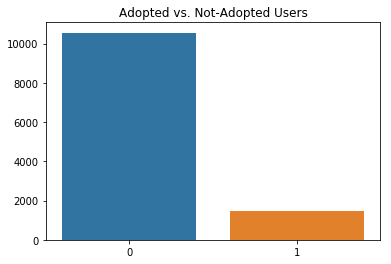

In [29]:
# Take another look at the distribution of the target class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = list(df_features['Adopted'].value_counts().index), y = df_features['Adopted'].value_counts())
plt.ylabel('')
plt.title('Adopted vs. Not-Adopted Users')
plt.show()

In [30]:
df_features['invited_by_user_id'] = df_features['invited_by_user_id'].fillna(0)
df_features['invited_by_user_id'] = df_features['invited_by_user_id'].apply(
        lambda x: 1 if x!=0 else 0)

# One-hot-encode creation_source# One-ho
df_features = pd.get_dummies(data=df_features,columns=['creation_source'])
df_features.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,
1,1,0,11,1,0,1,0,0,0,0
2,0,0,1,1,1,0,1,0,0,0
3,0,0,94,1,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,0,0
5,0,0,193,1,0,1,0,0,0,0


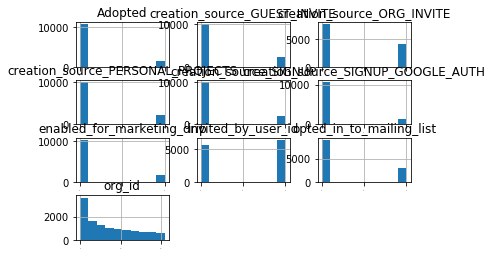

In [31]:
df_features.hist(sharex=False, sharey=False, xlabelsize=1)
plt.show()

In [32]:
df_features.corr()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
opted_in_to_mailing_list,1.000000,0.483529,0.003432,0.006934,0.010339,0.000667,0.006694,-0.007432,0.002181,-0.004555
enabled_for_marketing_drip,0.483529,1.000000,0.009275,0.002216,0.005901,-0.002438,0.004270,-0.007518,0.004528,0.000127
org_id,0.003432,0.009275,1.000000,-0.018442,0.060683,-0.002045,-0.017586,0.008974,0.016140,-0.001052
invited_by_user_id,0.006934,0.002216,-0.018442,1.000000,0.022735,0.437386,0.691238,-0.495336,-0.491916,-0.387255
Adopted,0.010339,0.005901,0.060683,0.022735,1.000000,0.043657,-0.011376,-0.072093,0.016004,0.031432
creation_source_GUEST_INVITE,0.000667,-0.002438,-0.002045,0.437386,0.043657,1.000000,-0.347502,-0.216653,-0.215157,-0.169380
creation_source_ORG_INVITE,0.006694,0.004270,-0.017586,0.691238,-0.011376,-0.347502,1.000000,-0.342395,-0.340031,-0.267686
creation_source_PERSONAL_PROJECTS,-0.007432,-0.007518,0.008974,-0.495336,-0.072093,-0.216653,-0.342395,1.000000,-0.211995,-0.166891
creation_source_SIGNUP,0.002181,0.004528,0.016140,-0.491916,0.016004,-0.215157,-0.340031,-0.211995,1.000000,-0.165739
creation_source_SIGNUP_GOOGLE_AUTH,-0.004555,0.000127,-0.001052,-0.387255,0.031432,-0.169380,-0.267686,-0.166891,-0.165739,1.000000


In [33]:
# Prepare to Model

from sklearn.metrics   import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

C:\Users\rivas\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
#  Preparing for most important features for prediction .
cols = list(df_features.columns.values)
feature_cols = [col for col in cols]
y_pos = np.arange(len(feature_cols))

In [35]:
# Data Imbalance
"""
we use SMOTE method to synthetically generate 
samples in the minority group to match the majority group's count.
"""
from imblearn.over_sampling import SMOTE

In [36]:
# Get target and features
y = df_features.pop('Adopted')
X = df_features

In [37]:
# Split data test/train

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9000, 9) (3000, 9) (9000,) (3000,)


In [38]:
# SMOTE 
import numpy as np
X_train_smote, y_train_smote = SMOTE().fit_sample(X_train, y_train)


In [39]:
# Define ml_model_1:
# takes in model Instantiate model (model)
# fits, predicts, and evaluates (prints results)
def ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test):
    print('Running ', modelnm)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Evaluate
    print(modelnm,' score: ',model.score(X_test, y_test))
    print(' ')
    # Compute and print the confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [ ]:
# Running a few models

In [40]:
# Logistic Regression
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
lr = LogisticRegression(random_state=0)
lr_pred = ml_model_1(lr, 'LogisticRegression', X_train, X_test, y_train, y_test)

Running  LogisticRegression
LogisticRegression  score:  0.8783333333333333
 
[[2635    0]
 [ 365    0]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94      2635
          1       0.00      0.00      0.00       365

avg / total       0.77      0.88      0.82      3000



C:\Users\rivas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
# Logistic Regression  using SMOTE  X_train_smote, y_train_smote
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
lr = LogisticRegression(random_state=0)
lr_pred = ml_model_1(lr, 'LogisticRegression', X_train_smote, X_test, y_train_smote, y_test)

Running  LogisticRegression
LogisticRegression  score:  0.515
 
[[1316 1319]
 [ 136  229]]
             precision    recall  f1-score   support

          0       0.91      0.50      0.64      2635
          1       0.15      0.63      0.24       365

avg / total       0.81      0.52      0.59      3000



In [42]:
# KNeighborsClassifier
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn_pred = ml_model_1(knn, 'KNeighborsClassifier', X_train, X_test, y_train, y_test)

Running  KNeighborsClassifier
KNeighborsClassifier  score:  0.8423333333333334
 
[[2510  125]
 [ 348   17]]
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      2635
          1       0.12      0.05      0.07       365

avg / total       0.79      0.84      0.81      3000



In [43]:
# KNeighborsClassifier  using SMOTE X_train_smote, y_train_smote
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn_pred = ml_model_1(knn, 'KNeighborsClassifier', X_train_smote, X_test, y_train_smote, y_test)

Running  KNeighborsClassifier
KNeighborsClassifier  score:  0.7276666666666667
 
[[2097  538]
 [ 279   86]]
             precision    recall  f1-score   support

          0       0.88      0.80      0.84      2635
          1       0.14      0.24      0.17       365

avg / total       0.79      0.73      0.76      3000



In [44]:
# RandomForestClassifier
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_pred = ml_model_1(rf, 'RandomForestClassifier', X_train, X_test, y_train, y_test)

Running  RandomForestClassifier
RandomForestClassifier  score:  0.8343333333333334
 
[[2475  160]
 [ 337   28]]
             precision    recall  f1-score   support

          0       0.88      0.94      0.91      2635
          1       0.15      0.08      0.10       365

avg / total       0.79      0.83      0.81      3000



In [45]:
# RandomForestClassifier using SMOTE X_train_smote, y_train_smote
# ml_model_1(model, modelnm,  X_train, X_test, y_train, y_test)
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_pred = ml_model_1(rf, 'RandomForestClassifier', X_train_smote, X_test, y_train_smote, y_test)

Running  RandomForestClassifier
RandomForestClassifier  score:  0.803
 
[[2370  265]
 [ 326   39]]
             precision    recall  f1-score   support

          0       0.88      0.90      0.89      2635
          1       0.13      0.11      0.12       365

avg / total       0.79      0.80      0.80      3000



In [46]:
# GradientBoostingClassifier
# from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=7)
gbc_pred = ml_model_1(gbc, 'GradientBoostingClassifier', X_train, X_test, y_train, y_test)

Running  GradientBoostingClassifier
GradientBoostingClassifier  score:  0.878
 
[[2634    1]
 [ 365    0]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94      2635
          1       0.00      0.00      0.00       365

avg / total       0.77      0.88      0.82      3000



In [47]:
# GradientBoostingClassifier using SMOTE X_train_smote, y_train_smote
# from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=7)
gbc_pred = ml_model_1(gbc, 'GradientBoostingClassifier', X_train_smote, X_test, y_train_smote, y_test)

Running  GradientBoostingClassifier
GradientBoostingClassifier  score:  0.8776666666666667
 
[[2633    2]
 [ 365    0]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.93      2635
          1       0.00      0.00      0.00       365

avg / total       0.77      0.88      0.82      3000



In [ ]:
# top  performing algorithm 
GradientBoostingClassifier  using SMOTE
Running  GradientBoostingClassifier
GradientBoostingClassifier  score:  0.8776666666666667
 
[[2633    2]
 [ 365    0]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.93      2635
          1       0.00      0.00      0.00       365

avg / total       0.77      0.88      0.82      3000



In [48]:
print(X_train_smote.shape, y_train_smote.shape, X_test.shape,  y_test.shape, X_train.shape, y_train.shape)

(15840, 9) (15840,) (3000, 9) (3000,) (9000, 9) (9000,)


In [61]:
# Examine the model feature importance.
gbc.feature_importances_.shape

(9,)

In [62]:
features = pd.Series(gbc.feature_importances_, index=X.columns)

In [63]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=gbc.feature_importances_, palette='Blues')

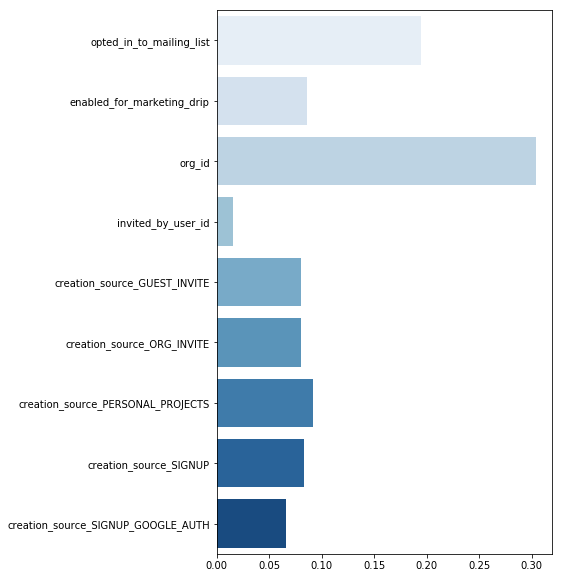

In [64]:
plt.show()

# Conclusion

Takeaways from the data exploration that the company could move forward with:
   
   The Orig_ID is the most important feature regarding prediction of an adopted user
   
   Sourc Creation - Guest Invite has the highest chance of being an adopted user at 15%
   
   Adopted users seen here were not on the mailing list or part of the regular marketing drip, which means that these two avenues of company outreach may not be worth continuing
   
